In [1]:
import tensorflow as tf
import numpy as np
# from tensorflow.keras.datasets import mnist

# (x_train, t_train), (x_test, t_test) = mnist.load_data()

from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, 
      ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, 
      ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

print(tf.__version__)

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(1234)
tf.random.set_seed(1234)


 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]
2.0.0


0 : T-shirt/top  
1 : Trouser  
2 : Pullover  
3 : Dress  
4 : Coat  
5 : Sandal  
6 : Shirt  
7 : Sneaker  
8 : Bag  
9 : Ankel boot  

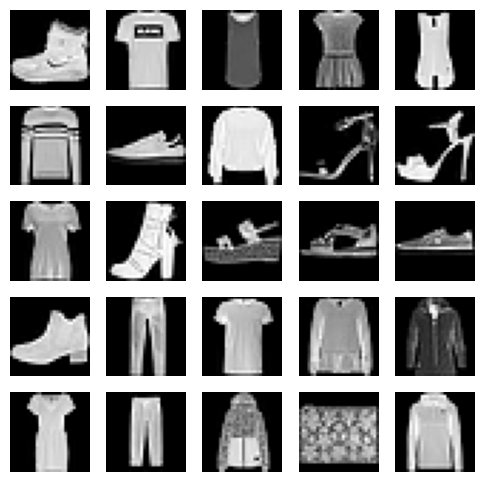

In [2]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')   
    # plt.title(str(t_train[index]))

plt.show()

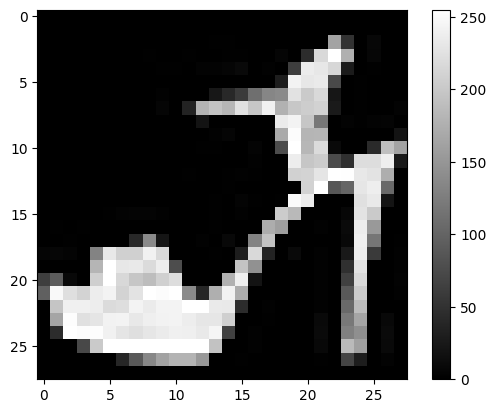

In [3]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

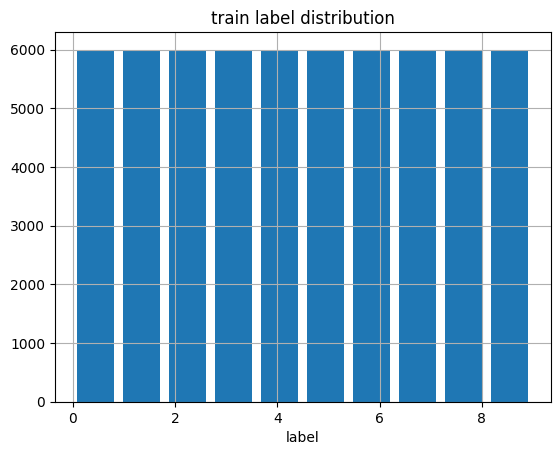

In [4]:
plt.title('train label distribution')
plt.grid()
plt.xlabel('label')

plt.hist(t_train, bins=10, rwidth=0.8)

plt.show()

In [5]:
# 학습데이터 정답 분포 확인

label_distribution = np.zeros(10)

for idx in range(len(t_train)):

    label = int(t_train[idx])

    label_distribution[label] = label_distribution[label] + 1


print(label_distribution)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)


# 정답 데이터 원핫 인코딩 (One-Hot Encoding)

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)

t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))   

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 - 3s - loss: 0.5468 - accuracy: 0.8086 - val_loss: 0.4397 - val_accuracy: 0.8437
Epoch 2/30
42000/42000 - 3s - loss: 0.4024 - accuracy: 0.8561 - val_loss: 0.3858 - val_accuracy: 0.8628
Epoch 3/30
42000/42000 - 3s - loss: 0.3625 - accuracy: 0.8683 - val_loss: 0.3811 - val_accuracy: 0.8641
Epoch 4/30
42000/42000 - 3s - loss: 0.3360 - accuracy: 0.8767 - val_loss: 0.3838 - val_accuracy: 0.8592
Epoch 5/30
42000/42000 - 3s - loss: 0.3160 - accuracy: 0.8837 - val_loss: 0.3457 - val_accuracy: 0.8776
Epoch 6/30
42000/42000 - 3s - loss: 0.3010 - accuracy: 0.8881 - val_loss: 0.3404 - val_accuracy: 0.8754
Epoch 7/30
42000/42000 - 3s - loss: 0.2875 - accuracy: 0.8942 - val_loss: 0.3316 - val_accuracy: 0.8803
Epoch 8/30
42000/42000 - 3s - loss: 0.2725 - accuracy: 0.8990 - val_loss: 0.3315 - val_accuracy: 0.8818
Epoch 9/30
42000/42000 - 4s - loss: 0.2654 - accuracy: 0.9006 - val_loss: 0.3551 - val_accuracy: 0.8755
Epoch 10/30
42

In [11]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,0.546809,0.808595,0.439684,0.843722
1,0.402401,0.856119,0.385808,0.862833
2,0.362506,0.868262,0.381110,0.864056
3,0.335992,0.876667,0.383794,0.859167
4,0.315991,0.883714,0.345696,0.877556
5,0.300979,0.888095,0.340362,0.875444
6,0.287508,0.894214,0.331596,0.880333
7,0.272479,0.899048,0.331505,0.881833
8,0.265447,0.900595,0.355141,0.875500
9,0.255126,0.905429,0.319020,0.888000


In [12]:
model.evaluate(x_test, t_test, verbose=2)

10000/1 - 0s - loss: 0.2744 - accuracy: 0.8804


[0.4146647958695889, 0.8804]

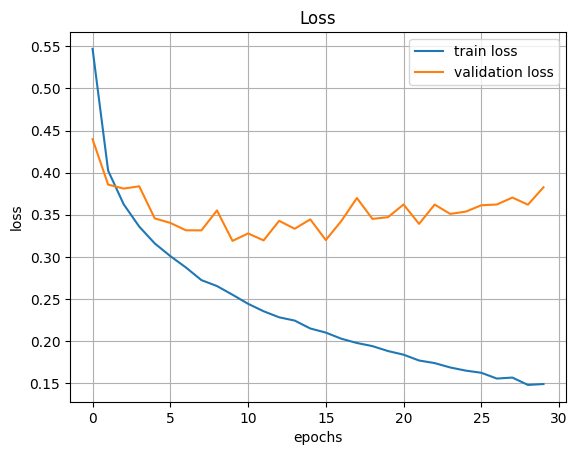

In [13]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

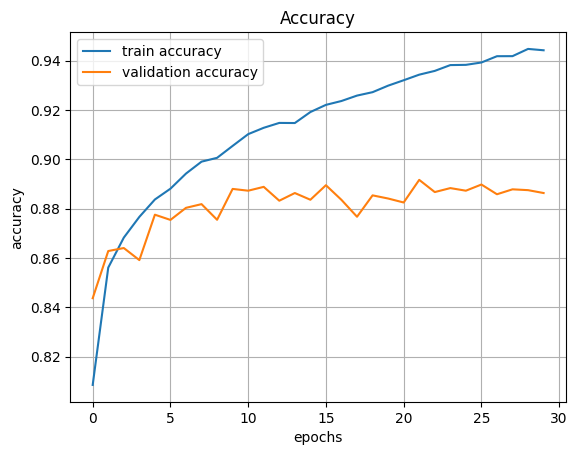

In [14]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

### [Matplotlib 눈금 표시하기](https://wikidocs.net/92089)

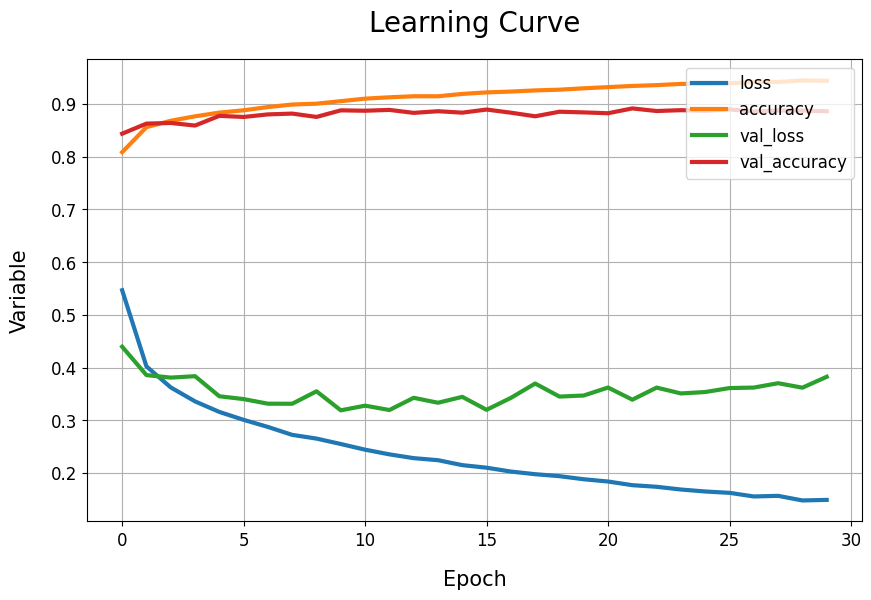

In [15]:
history_DF.plot(figsize=(10,6), linewidth=3)
plt.grid(True)
plt.legend(loc="upper right", fontsize=12)
plt.title("Learning Curve", fontsize=20, pad=20)
plt.xlabel('Epoch', fontsize=15, loc='center',labelpad=15)
plt.ylabel('Variable', fontsize=15, rotation=90, loc='center', labelpad=15)
plt.tick_params(axis='both', labelsize=12)
# plt.tick_params(axis='y', labelsize=15)

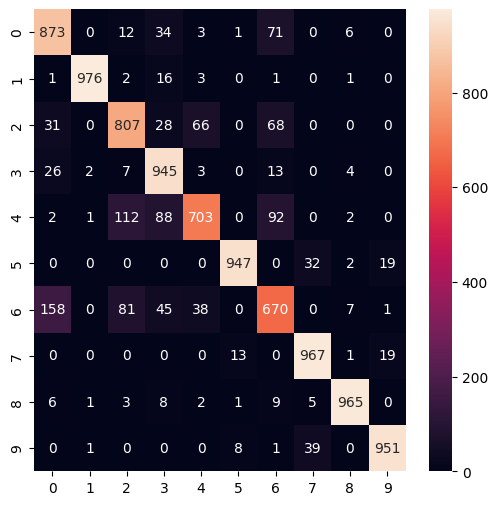

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(np.argmax(t_test, axis=-1),
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [17]:
print(cm)
print('\n')

for i in range(10):
    print(('label = %d\t(%d/%d)\taccuracy = %.3f') % 
          (i, np.max(cm[i]), np.sum(cm[i]), 
           np.max(cm[i])/np.sum(cm[i])))

[[873   0  12  34   3   1  71   0   6   0]
 [  1 976   2  16   3   0   1   0   1   0]
 [ 31   0 807  28  66   0  68   0   0   0]
 [ 26   2   7 945   3   0  13   0   4   0]
 [  2   1 112  88 703   0  92   0   2   0]
 [  0   0   0   0   0 947   0  32   2  19]
 [158   0  81  45  38   0 670   0   7   1]
 [  0   0   0   0   0  13   0 967   1  19]
 [  6   1   3   8   2   1   9   5 965   0]
 [  0   1   0   0   0   8   1  39   0 951]]


label = 0	(873/1000)	accuracy = 0.873
label = 1	(976/1000)	accuracy = 0.976
label = 2	(807/1000)	accuracy = 0.807
label = 3	(945/1000)	accuracy = 0.945
label = 4	(703/1000)	accuracy = 0.703
label = 5	(947/1000)	accuracy = 0.947
label = 6	(670/1000)	accuracy = 0.670
label = 7	(967/1000)	accuracy = 0.967
label = 8	(965/1000)	accuracy = 0.965
label = 9	(951/1000)	accuracy = 0.951


In [18]:
# 정답 및 예측 값 분포 확인
label_distribution = np.zeros(10)
prediction_distribution = np.zeros(10)

print(predicted_value.shape)
for idx in range(len(t_test)):

    label = int(np.argmax(t_test[idx]))

    label_distribution[label] = label_distribution[label] + 1

    prediction = int(np.argmax(predicted_value[idx]))

    prediction_distribution[prediction] = prediction_distribution[prediction] + 1


print(label_distribution)
print(prediction_distribution)

(10000, 10)
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[1097.  981. 1024. 1164.  818.  970.  925. 1043.  988.  990.]
